In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

rc = {"font.family": "serif",  # fonte serifada
      "mathtext.fontset": "cm",  # texto matemático em LaTeX
      "font.size": 14,  # Usar tamanho 12 ou 14
      "axes.axisbelow": True,  # grid abaixo dos dados
      "text.usetex": True,
      "axes.grid": True
      }

%matplotlib inline

plt.rcParams.update(rc)

x = np.arange(-10, 11, 1)
y = x**2


False

# Coleta dos dados

## Área e capacitância equivalente

In [2]:
area = np.pi * 89.60**2
c_eq = 111e-12

area


25221.20847784343

## Tabela 1 vazia

In [3]:


tab_1 = pd.DataFrame({})

tab_1['d'] = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
tab_1['C_0'] = np.array([150, 93, 55, 40, 32, 27, 23, 21, 19, 17, 16]) #* 1e-12

tab_1.head(3)


,d,C_0
0,1,150
1,2,93
2,4,55


In [4]:
def regressao_polinomial(x, y, deg=1, return_all=False):
    """
    - Retorna: 
      coeficientes, polinomio, regressão | regressao
    """
    coeficientes = np.polyfit(x, y, deg=deg)
    polinomio = np.poly1d(coeficientes)
    regressao = polinomio(x)
    return [coeficientes, polinomio, regressao] if return_all else regressao


## Tabela 2 cheia

In [5]:
tab_2 = pd.DataFrame({})

tab_2['d'] = range(1, 7)
tab_2['C_1'] = np.array([160, 145, 127, 122, 110, 103]) #* 1e-12
tab_2['C_2'] = np.array([159, 126, 106, 94, 83, 75]) #* 1e-12

tab_2


,d,C_1,C_2
0,1,160,159
1,2,145,126
2,3,127,106
3,4,122,94
4,5,110,83
5,6,103,75


# Gráficos

## Capacitor vazio

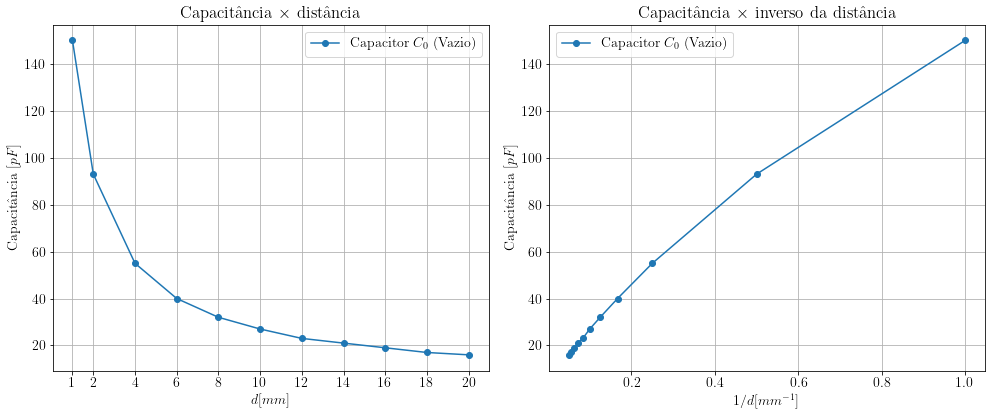

In [6]:
f, ax = plt.subplots(ncols=2,figsize=(14,6))

ax[0].plot(
  tab_1['d'], tab_1['C_0'], 
  '-o',
  label='Capacitor $C_0$ (Vazio)',)

ax[1].plot(
    1/tab_1['d'], tab_1['C_0'],
    '-o',
    label='Capacitor $C_0$ (Vazio)',)

ax[0].set_xticks(tab_1['d'])
ax[0].set_xlabel('$d[mm]$')
ax[0].set_title(r'Capacitância $\times$ distância')

ax[1].set_title(r'Capacitância $\times$ inverso da distância')

ax[1].set_xlabel('$1/d [mm^{-1}]$')

for a in ax.flat:
  a.legend(loc='best')
  a.set(ylabel='Capacitância $[pF]$')
  
f.tight_layout()
f.savefig('cap-c0.pdf')
plt.show()

## Capacitor com papel e com plástico

In [7]:
coef_c1, pol_c1, reg_c1 = regressao_polinomial(
    x=(1/tab_2['d'])*100, y=tab_2['C_1'], return_all=True)
coef_c2, pol_c2, reg_c2 = regressao_polinomial(
    x=1/tab_2['d']*100, y=tab_2['C_2'], return_all=True)


In [8]:
print(pol_c1, '\n', pol_c2,)


 
0.6377 x + 101.8 
  
0.9649 x + 67.77


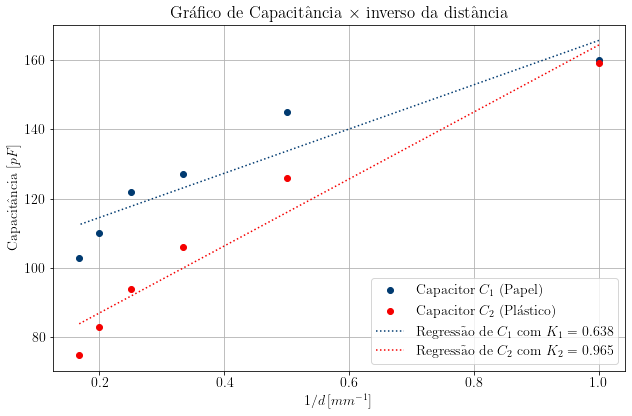

In [9]:
f, ax = plt.subplots(figsize=(9, 6))

ax.plot(1/tab_2['d'], tab_2['C_1'], 'o',
        label='Capacitor $C_1$ (Papel)', color='#003A70')
ax.plot(1/tab_2['d'], tab_2['C_2'], 'o',
        label='Capacitor $C_2$ (Plástico)', color='#F50000')


ax.plot(1/tab_2['d'], reg_c1,  ':',
        label=f'Regressão de $C_1$ com $K_1 = {coef_c1[0].round(3)}$', color='#003A70')
ax.plot(1/tab_2['d'], reg_c2,  ':',
        label=f'Regressão de $C_2$ com $K_2 = {coef_c2[0].round(3)}$', color='#F50000')

ax.set(
    title=r'Gráfico de Capacitância $\times$ inverso da distância',
    xlabel=r'$1/d\, [mm^{-1}]$',
    ylabel=r'Capacitância $[pF]$'
)

ax.legend(loc='lower right')

f.tight_layout()
f.savefig('c0-c1.pdf')

plt.show()


## Completando a tabela 1

In [10]:
tab_1['C_1'] = tab_1['C_0'] * coef_c1[0]
tab_1['C_2'] = tab_1['C_0'] * coef_c2[0]

tab_1

,d,C_0,C_1,C_2
0,1,150,95.652051,144.738331
1,2,93,59.304272,89.737765
2,4,55,35.072419,53.070721
3,6,40,25.507214,38.596888
4,8,32,20.405771,30.877511
5,10,27,17.217369,26.052900
6,12,23,14.666648,22.193211
7,14,21,13.391287,20.263366
8,16,19,12.115926,18.333522
9,18,17,10.840566,16.403678


## Todos os capacitores

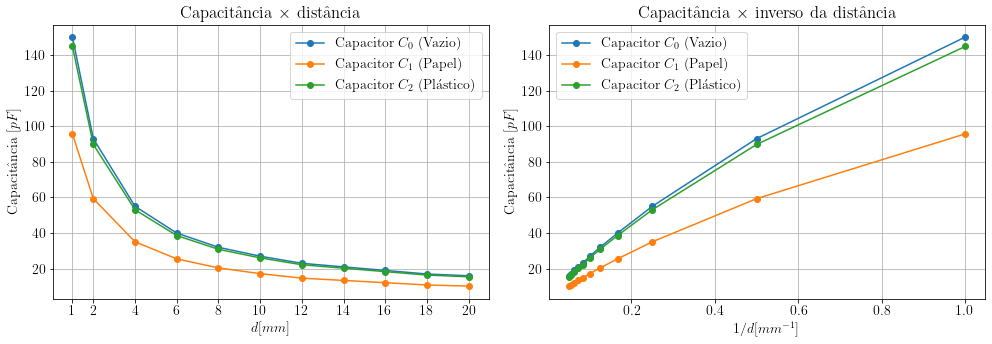

In [11]:
f, ax = plt.subplots(ncols=2,figsize=(14,5))

ax[0].plot(
  tab_1['d'], tab_1['C_0'], 
  '-o',
  label='Capacitor $C_0$ (Vazio)',)

ax[0].plot(
    tab_1['d'], tab_1['C_1'],
    '-o',
    label='Capacitor $C_1$ (Papel)',
)
ax[0].plot(
    tab_1['d'], tab_1['C_2'],
    '-o',
    label='Capacitor $C_2$ (Plástico)',
)

ax[1].plot(
    1/tab_1['d'], tab_1['C_0'],
    '-o',
    label='Capacitor $C_0$ (Vazio)',)

ax[1].plot(
    1/tab_1['d'], tab_1['C_1'],
    '-o',
    label='Capacitor $C_1$ (Papel)',
)
ax[1].plot(
    1/tab_1['d'], tab_1['C_2'],
    '-o',
    label='Capacitor $C_2$ (Plástico)',
)

ax[0].set_xticks(tab_1['d'])
ax[0].set_xlabel('$d[mm]$')
ax[0].set_title(r'Capacitância $\times$ distância')

ax[1].set_title(r'Capacitância $\times$ inverso da distância')

ax[1].set_xlabel('$1/d [mm^{-1}]$')

for a in ax.flat:
  a.legend(loc='best')
  a.set(ylabel='Capacitância $[pF]$')
  
f.tight_layout()
f.savefig('todos.pdf')
plt.show()

# Exportando as Tabelas

In [12]:
tab_1_latex = tab_1.rename({
  'd': '$d\, [mm]$',
  'C_0': '$C_0\, [pF]$',
  'C_1': '$C_1\, [pF]$',
  'C_2': '$C_2\, [pF]$'
}, axis=1)


tab_1_latex.iloc[:, 1:] = round(tab_1_latex.iloc[:, 1:])

tab_1_latex

,"$d\, [mm]$","$C_0\, [pF]$","$C_1\, [pF]$","$C_2\, [pF]$"
0,1,150,96.0,145.0
1,2,93,59.0,90.0
2,4,55,35.0,53.0
3,6,40,26.0,39.0
4,8,32,20.0,31.0
5,10,27,17.0,26.0
6,12,23,15.0,22.0
7,14,21,13.0,20.0
8,16,19,12.0,18.0
9,18,17,11.0,16.0


In [13]:

tab_1_latex.T.to_latex(
  buf='./tab_1_preenchida.tex',
  bold_rows=True,
  escape=False,
  index=True,
  encoding='utf-8',
  header=False
)

/tmp/ipykernel_9713/1967370205.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tab_1_latex.T.to_latex(


In [14]:
tab_0_latex = tab_1_latex.copy()

tab_0_latex.iloc[:, 2:] = "-"

tab_0_latex

,"$d\, [mm]$","$C_0\, [pF]$","$C_1\, [pF]$","$C_2\, [pF]$"
0,1,150,-,-
1,2,93,-,-
2,4,55,-,-
3,6,40,-,-
4,8,32,-,-
5,10,27,-,-
6,12,23,-,-
7,14,21,-,-
8,16,19,-,-
9,18,17,-,-


In [15]:
tab_0_latex.T.to_latex(
    buf='./tab_1_vazia.tex',
    bold_rows=True,
    escape=False,
    index=True,
    encoding='utf-8',
    header=False
)


/tmp/ipykernel_9713/1173118712.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tab_0_latex.T.to_latex(


In [16]:
tab_2_latex = tab_2.copy()

tab_2_latex.rename({
    'd': '$d\, [mm]$',
    'C_1': '$C_1\, [pF]$',
    'C_2': '$C_2\, [pF]$'
}, axis=1, inplace=True)

tab_2_latex

,"$d\, [mm]$","$C_1\, [pF]$","$C_2\, [pF]$"
0,1,160,159
1,2,145,126
2,3,127,106
3,4,122,94
4,5,110,83
5,6,103,75


In [17]:
tab_2_latex.T.to_latex(
    buf='./tab_2_preenchida.tex',
    bold_rows=True,
    escape=False,
    index=True,
    encoding='utf-8',
    header=False,
    column_format='c'*len(tab_2_latex)
)


/tmp/ipykernel_9713/3342964785.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tab_2_latex.T.to_latex(
